In [1]:
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [3]:
pwd

'/Users/alkatiwari/Documents/FloodMapping'

In [4]:
# Define directories
pluvial_dir = "Pluvial_def_1in100"
fluvial_dir = "Fluvial_def_1in100"


In [5]:
# Define file names
file_names = ["n29w098.tif", "n29w099.tif", "n30w098.tif", "n30w099.tif"]

# Generate file paths
tif_files = [
    os.path.join(pluvial_dir, file) for file in file_names
] + [
    os.path.join(fluvial_dir, file) for file in file_names
]

In [11]:
def plot_tif_on_map(tif_path, ax, title):
    with rasterio.open(tif_path) as dataset:
        img = dataset.read(1)  # Read first band
        bounds = dataset.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        
        # Masking no-data values
        img = np.ma.masked_equal(img, dataset.nodata)
        
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
        
        img_plot = ax.imshow(img, extent=extent, transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.6)
        ax.set_title(title)
        return img_plot, img

<ipython-input-12-c9f18fee3500>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar


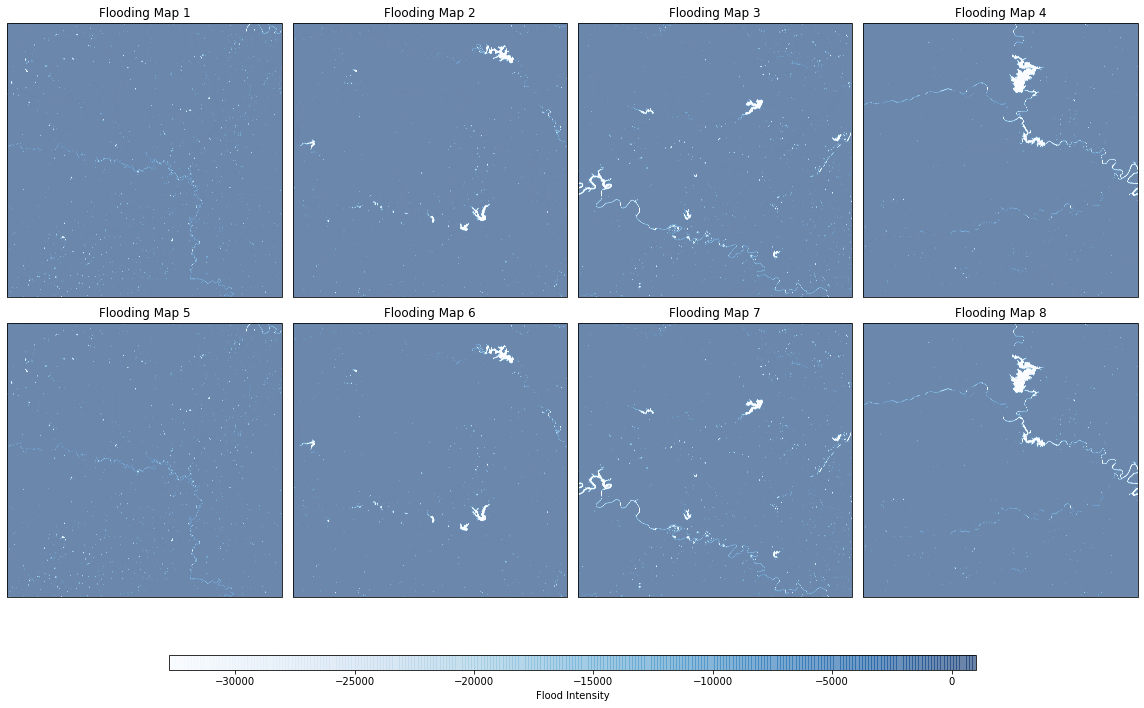

In [12]:
# Create figure and axes
fig, axes = plt.subplots(2, 4, figsize=(16, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.ravel()

img_plots = []
all_images = []
for i, tif_file in enumerate(tif_files):
    img_plot, img_data = plot_tif_on_map(tif_file, axes[i], f"Flooding Map {i+1}")
    img_plots.append(img_plot)
    all_images.append(img_data)

# Create a global colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Positioning of the colorbar
cbar = fig.colorbar(img_plots[-1], cax=cbar_ax, orientation='horizontal')
cbar.set_label("Flood Intensity")

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to accommodate colorbar
plt.show()
